In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import os
import sys

# Determine the absolute path to your training data folder.
project_root = os.path.abspath(
    os.path.join(os.path.dirname(__file__) if '__file__' in globals() else os.getcwd(), '..')
)

# Insert project_root to sys.path if needed.
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Build the path to the data folder (assuming your data folder is directly under the project root)
data_dir = os.path.join(project_root, 'data')
data_small_dir = os.path.join(project_root, 'data_small')

print("Project root:", project_root)
print("Data directory:", data_dir)

from models import get_model, effnetv2b0_base, effnetv2b3_base,train_model

from keras.models import Model
from keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

Project root: /home/phigep/fh/face-mask-detection
Data directory: /home/phigep/fh/face-mask-detection/data


2025-01-27 21:41:12.507487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738010472.602187    5772 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738010472.628552    5772 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-27 21:41:12.866627: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1738010476.615993    5772 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21

In [3]:
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
test_small_dir = os.path.join(data_small_dir, 'test')
val_dir = os.path.join(data_dir, 'validation')

In [4]:
BATCH_SIZE = 32
ORIGINAL_IMAGE_SIZE = (None, None)  # Allow variable sizes
TARGET_IMAGE_SIZE = (224, 224)       # EfficientNetV2's expected input size
EPOCHS = 25
AUTOTUNE = tf.data.AUTOTUNE

In [5]:
from preprocessing import get_augmented_dataset
train_dataset = get_augmented_dataset(train_dir)
test_dataset = get_augmented_dataset(test_dir,batch_size=1,shuffle=False)
test_small_dataset = get_augmented_dataset(test_small_dir,batch_size=1, shuffle=False)
validation_dataset = get_augmented_dataset(val_dir,batch_size=32, shuffle=False)

Found 73230 files belonging to 2 classes.
Found 19343 files belonging to 2 classes.
Found 1132 files belonging to 2 classes.
Found 36545 files belonging to 2 classes.


In [6]:
enetb0_model = get_model(effnetv2b0_base,input_dim=(224,224,3), resize_dim=(224,224,3), classes=2,classifier_activation="sigmoid", training_base=True)

In [7]:
from keras.optimizers import AdamW
optimizer = AdamW(learning_rate=5e-5)

In [8]:
enetb0_model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

change back to python to train:

In [9]:
modelname="effnetv2b0notfrozen"
enetb0_model,history = train_model(checkpoint_dir="./checkpoints/",
                                   epochs=10,
                                   model=enetb0_model,
                                   train_data=train_dataset,
                                   val_data=validation_dataset,
                                   modelname=modelname
                                   )

Epoch 1/10


I0000 00:00:1738010509.418243    6305 service.cc:148] XLA service 0x7dd584003640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738010509.418443    6305 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-01-27 21:41:50.829992: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738010513.323428    6305 cuda_dnn.cc:529] Loaded cuDNN version 90700


   2/2289 ━━━━━━━━━━━━━━━━━━━━ 1:57 51ms/step - accuracy: 0.5703 - loss: 0.6986   

I0000 00:00:1738010531.622372    6305 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2289/2289 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9721 - loss: 0.0944

2025-01-27 21:44:31.943707: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2428', 144 bytes spill stores, 144 bytes spill loads

2025-01-27 21:44:32.102654: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2428', 520 bytes spill stores, 520 bytes spill loads




Epoch 1: val_loss improved from inf to 0.00382, saving model to ./checkpoints/effnetv2b0notfrozen.keras
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 236s 82ms/step - accuracy: 0.9721 - loss: 0.0944 - val_accuracy: 0.9988 - val_loss: 0.0038 - learning_rate: 5.0000e-05
Epoch 2/10
2288/2289 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9983 - loss: 0.0056
Epoch 2: val_loss improved from 0.00382 to 0.00346, saving model to ./checkpoints/effnetv2b0notfrozen.keras
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 164s 72ms/step - accuracy: 0.9983 - loss: 0.0056 - val_accuracy: 0.9989 - val_loss: 0.0035 - learning_rate: 5.0000e-05
Epoch 3/10
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9988 - loss: 0.0043
Epoch 3: val_loss improved from 0.00346 to 0.00240, saving model to ./checkpoints/effnetv2b0notfrozen.keras
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 166s 72ms/step - accuracy: 0.9988 - loss: 0.0043 - val_accuracy: 0.9992 - val_loss: 0.0024 - learning_rate: 5.0000e-05
Epoch 4/10
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/s

In [10]:
from keras.models import load_model
enetb0_model = load_model(f"./checkpoints/{modelname}.keras")

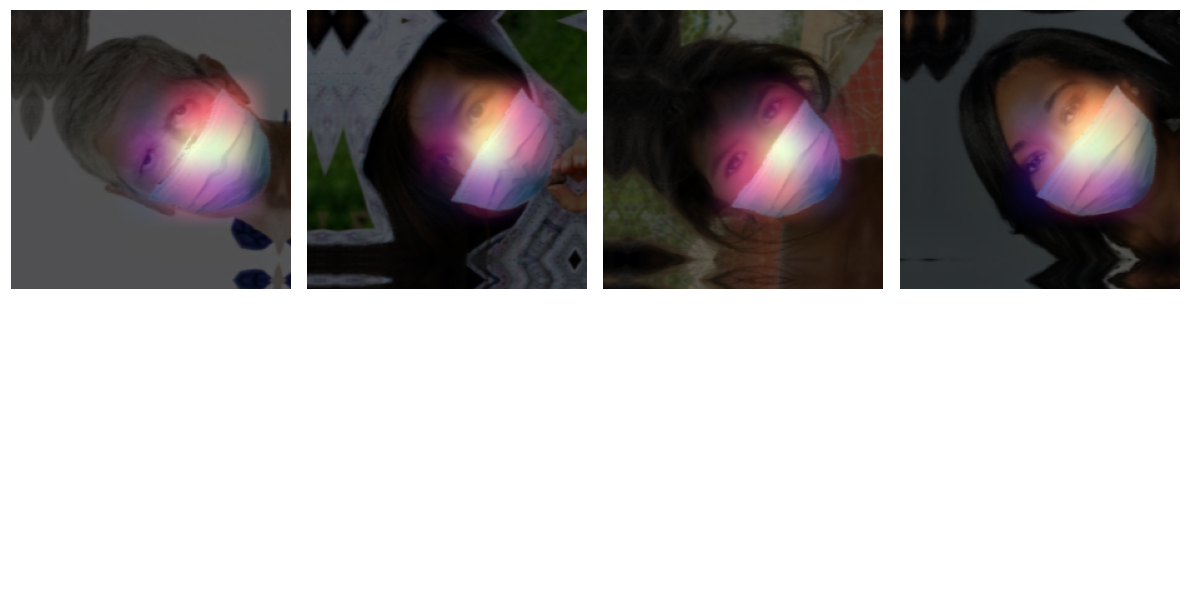

In [31]:
from eval import make_gradcam_heatmap, superimpose_gradcam,plot_images_grid
import matplotlib.pyplot as plt
final_images=[]
for images, labels in test_dataset.take(4):
    heatmap = make_gradcam_heatmap(model=enetb0_model,
                         last_conv_layer_name="efficientnetv2-b0",
                         img_array=images,
                         )
    final = superimpose_gradcam(heatmap=heatmap, img=images[0],alpha=2)
    final_images.append(final)
p=plot_images_grid(final_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


2025-01-27 22:17:35.037965: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


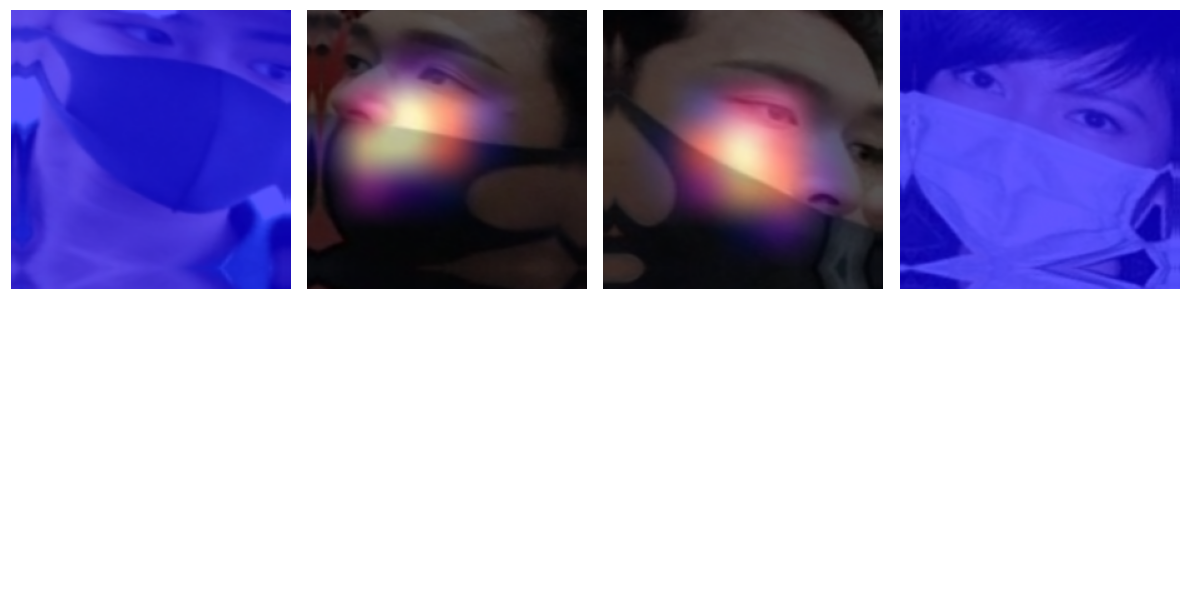

[0, 0, 0, 0]
[0, 0, 0, 0]


In [23]:
import numpy as np
final_images=[]
preds = []
labels = []
for images, label in test_small_dataset.take(4):
    heatmap = make_gradcam_heatmap(model=enetb0_model,
                         last_conv_layer_name="efficientnetv2-b0",
                         img_array=images,
                         )
    pred= enetb0_model.predict(images)
    preds.append(int(np.argmax(pred)))
    labels.append(int(np.argmax(label)))
    final = superimpose_gradcam(heatmap=heatmap, img=images[0],alpha=2)
    final_images.append(final)
p=plot_images_grid(final_images)
print(labels)
print(preds)

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, confusion_matrix, classification_report
def create_truncated_viridis():
    """
    Creates a truncated version of the viridis colormap up to dark green.
    
    Returns:
        LinearSegmentedColormap: A new colormap truncated to dark green.
    """
    viridis = plt.cm.get_cmap('viridis')
    
    # Determine the point to truncate the colormap
    # Adjust the trunc_point as needed to capture up to dark green
    trunc_point = 0.5  # Example value; adjust based on visualization
    
    # Generate new colors by sampling the viridis colormap up to trunc_point
    new_colors = viridis(np.linspace(0, trunc_point, 256))
    truncated_viridis = LinearSegmentedColormap.from_list('truncated_viridis', new_colors)
    
    return truncated_viridis
def evaluate_model_seaborn(test_dataset, y_true, y_pred):
    """
    Evaluates the model by computing various metrics and visualizing the confusion matrix using Seaborn.
    
    Args:
        test_dataset (iterable): An iterable of (image, label) tuples.
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
    
    Returns:
        dict: A dictionary containing evaluation metrics.
        list: A list of misclassified images.
    """
    # Generate classification report and metrics
    report = classification_report(y_true, y_pred, output_dict=True)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_true, y_pred)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    classes = np.unique(y_true)
    
    # Create truncated viridis colormap
    truncated_viridis = create_truncated_viridis()
    
    # Plot confusion matrix using seaborn with truncated viridis colormap
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=truncated_viridis,
                xticklabels=classes, yticklabels=classes,
                cbar=True)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
    # Identify misclassified samples
    misclassified = []
    for idx, (image, label) in enumerate(test_dataset):
        true_label = np.argmax(label,axis=1)[0]
        pred = y_pred[idx]
        #print(true_label,pred)
        if true_label != pred:
            misclassified.append([image.numpy(),true_label,pred])
    
    # Compile metrics
    metrics = {
        'accuracy': acc,
        'f1_score': f1,
        'matthews_corrcoef': mcc,
        'classification_report': report
    }
    
    return metrics, misclassified

In [25]:
def get_y_true(test_dataset):
    y_true = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)
    return y_true
y_true = get_y_true(test_dataset)
y_true = np.argmax(y_true, axis=1)

In [26]:
from sklearn.metrics import accuracy_score,f1_score,matthews_corrcoef, confusion_matrix
y_preds= enetb0_model.predict(test_dataset)
y_preds = np.argmax(y_preds, axis=1)

19343/19343 ━━━━━━━━━━━━━━━━━━━━ 106s 5ms/step


/tmp/ipykernel_5772/941382665.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


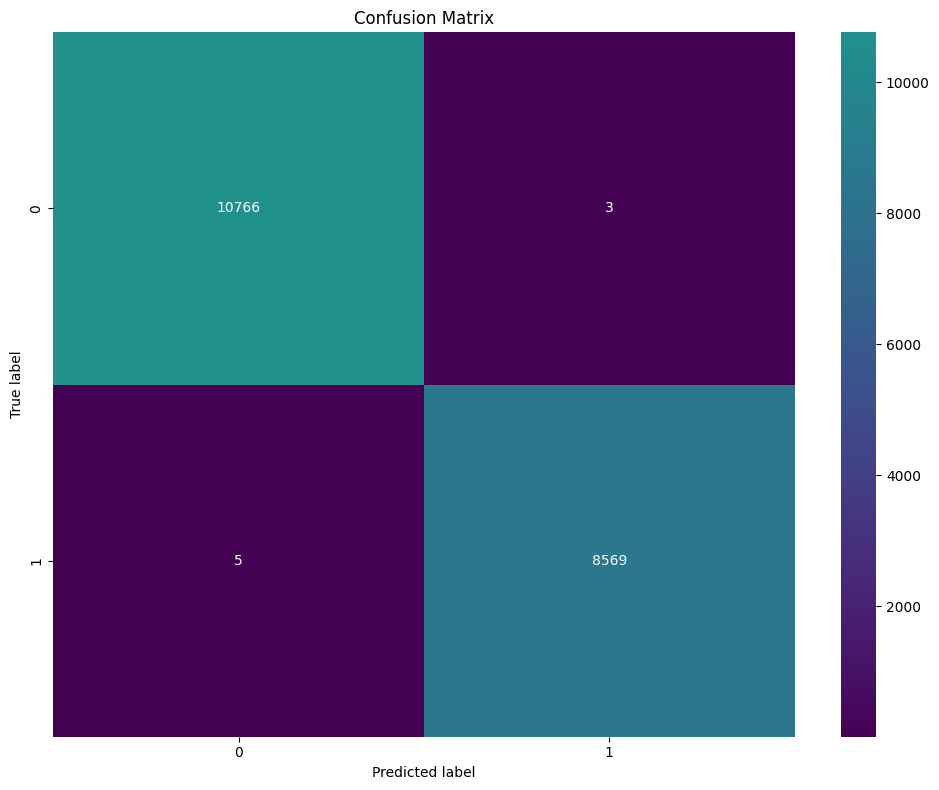

In [27]:
report, misclassified_images = evaluate_model_seaborn(test_dataset,y_true,y_preds)

In [28]:
report

{'accuracy': 0.9995864136897069,
 'f1_score': np.float64(0.999586408769111),
 'matthews_corrcoef': np.float64(0.9991620387654261),
 'classification_report': {'0': {'precision': 0.9995357905486956,
   'recall': 0.9997214226019129,
   'f1-score': 0.9996285979572888,
   'support': 10769.0},
  '1': {'precision': 0.9996500233317779,
   'recall': 0.9994168416141824,
   'f1-score': 0.9995334188732066,
   'support': 8574.0},
  'accuracy': 0.9995864136897069,
  'macro avg': {'precision': 0.9995929069402367,
   'recall': 0.9995691321080477,
   'f1-score': 0.9995810084152477,
   'support': 19343.0},
  'weighted avg': {'precision': 0.9995864255009855,
   'recall': 0.9995864136897069,
   'f1-score': 0.999586408769111,
   'support': 19343.0}}}

In [32]:
len(misclassified_images[0])

3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


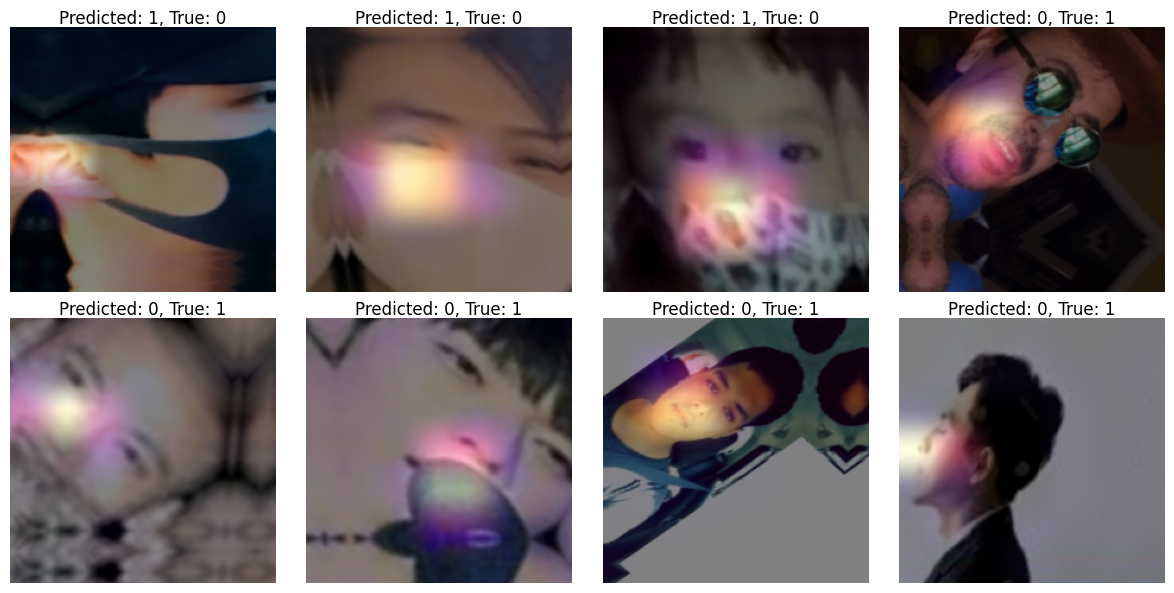

[]
[np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1)]


In [30]:
import numpy as np
final_images=[]
preds = []
labels = []
captions = []
for image in misclassified_images:
    heatmap = make_gradcam_heatmap(model=enetb0_model,
                         last_conv_layer_name="efficientnetv2-b0",
                         img_array=image[0],
                         )
    pred= np.argmax(enetb0_model.predict(image[0]),axis=1)
    #pred = enetb0_model.predict(image)
    preds.append(pred[0])
    final = superimpose_gradcam(heatmap=heatmap, img=image[0][0],alpha=1)
    final_images.append(final)
    captions.append(f"Predicted: {image[2]}, True: {image[1]}")
p=plot_images_grid(final_images,captions = captions)
print(labels)
print(preds)